Eliminate the unnecessory attributes

In [24]:
import pandas as pd

#OPTIMAL.csv is the name of CSV file containing the dataset
data = pd.read_csv('OPTIMAL.csv')

# List of selected attributes want to keep
#selected_attributes = ['age', 'gender', 'dementia_all', 'educationyears', 'EF', 'PS', 'Global', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'study1', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']
data.drop("dementia", axis=1, inplace=True)
data.drop("ID", axis=1, inplace=True)
data.drop("study1", axis=1, inplace=True)
# Selecting only the selected attributes

# Printing the selected dataframe
print(data)




        age  gender  dementia_all  educationyears        EF        PS  \
0     52.67    male             0            11.0 -2.403333 -1.290000   
1     64.58    male             0            10.0  1.280000  0.360000   
2     74.92    male             0             8.0 -1.440000 -1.520000   
3     74.83    male             1             9.0       NaN -2.136271   
4     79.25    male             0            10.0 -0.920000 -1.493333   
...     ...     ...           ...             ...       ...       ...   
1837  67.00  female             0            13.0 -0.100000 -0.020000   
1838  71.00  female             0            13.0 -0.370000 -1.060000   
1839  55.00    male             0            10.0  0.460000  0.960000   
1840  54.00    male             0            10.0  0.190000  0.030000   
1841  68.00  female             0            10.0  0.510000 -0.530000   

        Global  diabetes         smoking hypertension hypercholesterolemia  \
0    -1.287000         0  current-smoker     

Find the missing values

In [25]:
# Calculate total missing values and percentage of missing values for each column
total_missing = data.isnull().sum().sort_values(ascending=False)
percent_missing = (total_missing / len(data)) * 100

# Create a DataFrame to display missing data statistics
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])
missing_data = missing_data[missing_data['Total Missing'] > 0]  # Display only columns with missing values

# Display the first 20 rows of missing data statistics
print("Missing Data Statistics:")
print(missing_data.head(20))


Missing Data Statistics:
                   Total Missing  Percent Missing
SVD Amended Score            677        36.753529
SVD Simple Score             677        36.753529
Global                       308        16.720955
PS                           268        14.549403
EF                           208        11.292074
smoking                       11         0.597177


Missing data handling

In [26]:
data_copy = data.copy()
data_copy["EF"].fillna(data_copy["EF"].median(), inplace=True)
data_copy["PS"].fillna(data_copy["PS"].median(), inplace=True)
data_copy["Global"].fillna(data_copy["Global"].median(), inplace=True)
data_copy["SVD Simple Score"].fillna(data_copy["SVD Simple Score"].median(), inplace=True)
data_copy["smoking"].fillna(data_copy["smoking"].mode()[0], inplace=True)
data_copy.head()

,age,gender,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,hypertension,hypercholesterolemia,lacunes_num,fazekas_cat,study,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,male,0,11.0,-2.403333,-1.290000,-1.287000,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,scans,3.0,7.0,3,>5,>=1
1,64.58,male,0,10.0,1.280000,0.360000,0.744000,0,ex-smoker,Yes,Yes,more-than-zero,0 to 1,scans,2.0,3.0,1,1 to 2,>=1
2,74.92,male,0,8.0,-1.440000,-1.520000,-0.922000,0,never-smoker,Yes,Yes,more-than-zero,0 to 1,scans,1.0,2.0,1,1 to 2,0
3,74.83,male,1,9.0,0.130000,-2.136271,-1.301102,0,current-smoker,Yes,Yes,more-than-zero,2 to 3,scans,2.0,4.0,2,3 to 5,0
4,79.25,male,0,10.0,-0.920000,-1.493333,-0.924000,0,ex-smoker,Yes,Yes,more-than-zero,2 to 3,scans,2.0,3.0,2,1 to 2,0


Bar graph for dementia_all

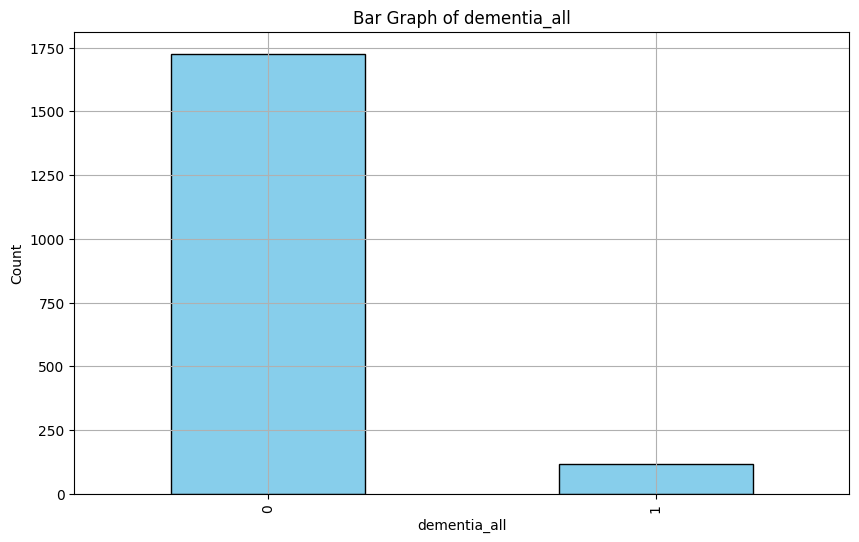

In [29]:
import matplotlib.pyplot as plt
# Categorical feature for the bar graph
categorical_feature = 'dementia_all'

# Count the occurrences of each category
category_counts = data_copy[categorical_feature].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel(categorical_feature)
plt.ylabel('Count')
plt.title('Bar Graph of {}'.format(categorical_feature))
plt.grid(True)
plt.show()


Scatterplot for age vs dementia

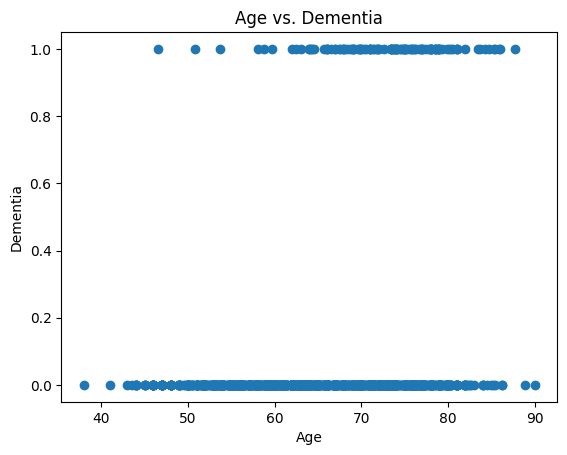

In [32]:
import seaborn as sns
import numpy as np

age = data_copy['age']
dementia = data_copy['dementia_all']

# Create a scatter plot
plt.scatter(age, dementia)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Dementia')
plt.title('Age vs. Dementia')

# Show the plot
plt.show()




Dementia vs Diabetics

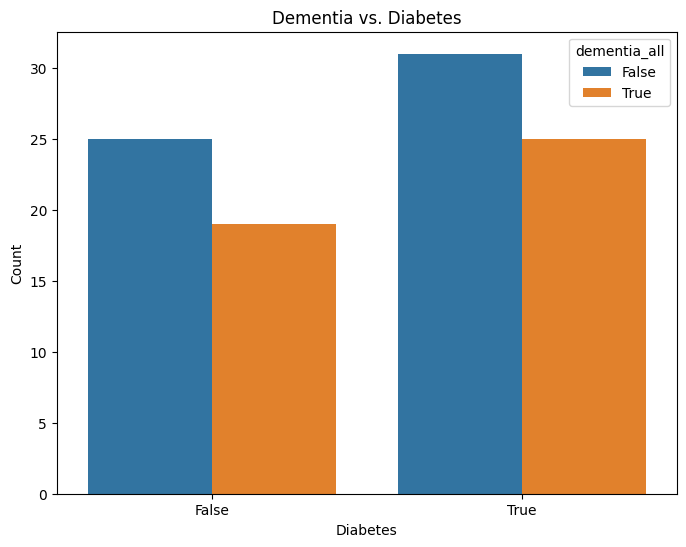

In [31]:
# Creating sample data
np.random.seed(42)
num_samples = 100

# Create a sample DataFrame with binary and continuous data
data = {
    'dementia_all': np.random.choice([True, False], num_samples),
    'diabetes': np.random.choice([True, False], num_samples),
    'smoking': np.random.choice([True, False], num_samples),
    'age': np.random.randint(40, 90, num_samples),
    'gender': np.random.choice(['Male', 'Female'], num_samples),
}

df = pd.DataFrame(data)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', hue='dementia_all', data=df)
plt.title("Dementia vs. Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()



Dementia vs smoking

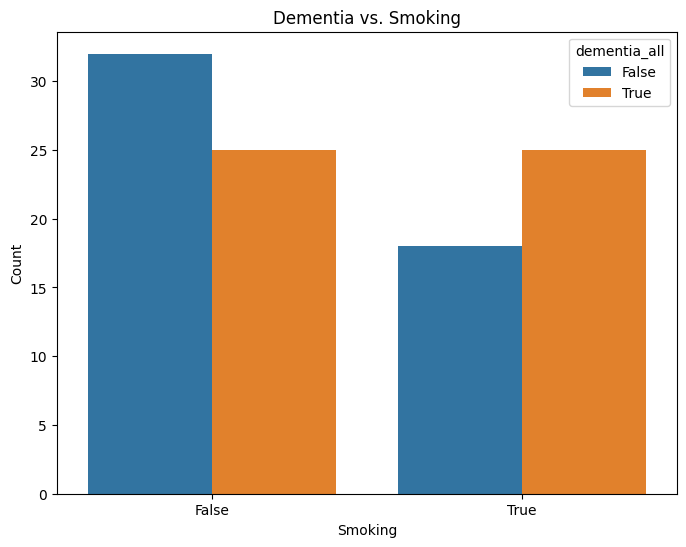

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', hue='dementia_all', data=df)
plt.title("Dementia vs. Smoking")
plt.xlabel("Smoking")
plt.ylabel("Count")
plt.show()


Dementia vs Age

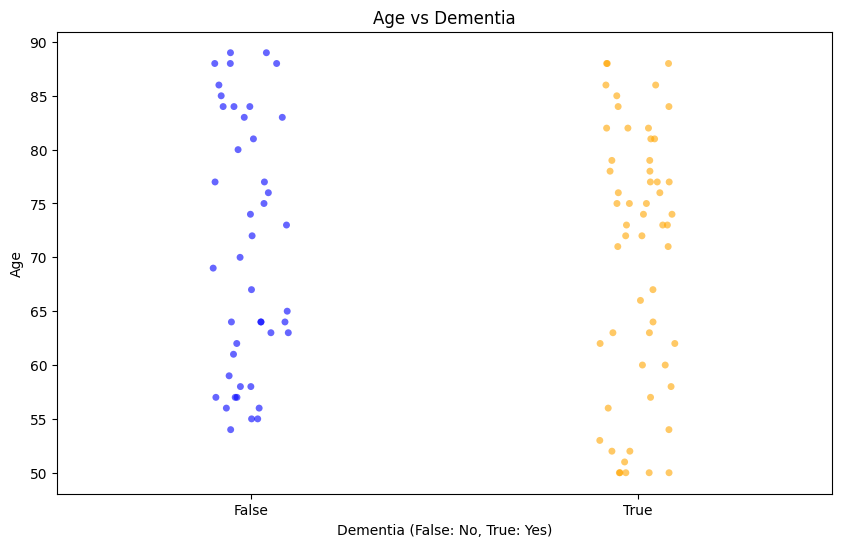

In [37]:
np.random.seed(42)  # For reproducibility

# Create a sample DataFrame with dementia_all and age
df = pd.DataFrame({
    'dementia_all': np.random.choice([0, 1], 100),  # Random binary data (0 or 1)
    'age': np.random.randint(50, 90, 100)  # Random ages between 50 and 90
})

# Convert 0 and 1 to "False" and "True" for better readability
df['dementia_all'] = df['dementia_all'].map({0: 'False', 1: 'True'})

# Create the stripplot with the specified palette
plt.figure(figsize=(10, 6))
sns.stripplot(x='dementia_all', y='age', data=df, jitter=True, alpha=0.6, hue='dementia_all', palette={'False': 'blue', 'True': 'orange'}, legend=False)
plt.title("Age vs Dementia")
plt.xlabel("Dementia (False: No, True: Yes)")
plt.ylabel("Age")

plt.show()


Dementia vs Gender

DataFrame columns: Index(['dementia_all', 'diabetes', 'smoking', 'age', 'gender'], dtype='object')
First few rows:
   dementia_all  diabetes  smoking  age  gender
0          True     False    False   80  Female
1          True     False    False   46  Female
2         False     False    False   43    Male
3          True      True     True   89    Male
4         False      True     True   84  Female


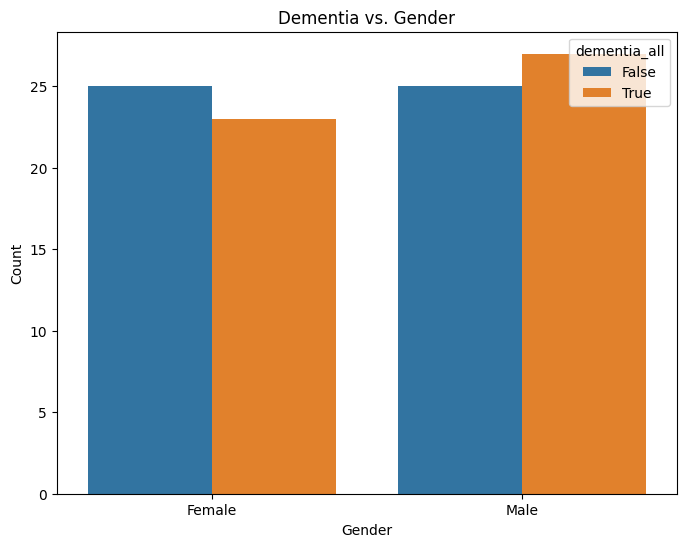

In [38]:
# Ensure a fixed number of samples
num_samples = 100

# Create data with specified columns
data = {
    'dementia_all': np.random.choice([True, False], num_samples),
    'diabetes': np.random.choice([True, False], num_samples),
    'smoking': np.random.choice([True, False], num_samples),
    'age': np.random.randint(40, 90, num_samples),
    'gender': np.random.choice(['Male', 'Female'], num_samples),
}

# Create DataFrame
df = pd.DataFrame(data)

# Check the DataFrame's content
print("DataFrame columns:", df.columns)
print("First few rows:")
print(df.head())

# Generate the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='dementia_all', data=df)
plt.title("Dementia vs. Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


Finding out outliers in attributes in ascending order

In [39]:
from scipy.stats import zscore
# Calculate the z-score for each numeric attribute
z_scores = data_copy.select_dtypes(include=np.number).apply(zscore)

# Count the number of outliers (z-score > 3 or z-score < -3) for each attribute
outlier_counts = (z_scores.abs() > 3).sum().sort_values()

print("Attributes sorted by number of outliers in ascending order:")
for attr, count in outlier_counts.items():
    print(f"{attr}: {count} outliers")

Attributes sorted by number of outliers in ascending order:
diabetes: 0 outliers
SVD Amended Score: 0 outliers
Fazekas: 0 outliers
age: 1 outliers
educationyears: 3 outliers
PS: 6 outliers
Global: 7 outliers
EF: 20 outliers
SVD Simple Score: 76 outliers
dementia_all: 116 outliers


Handling outliers in SVD

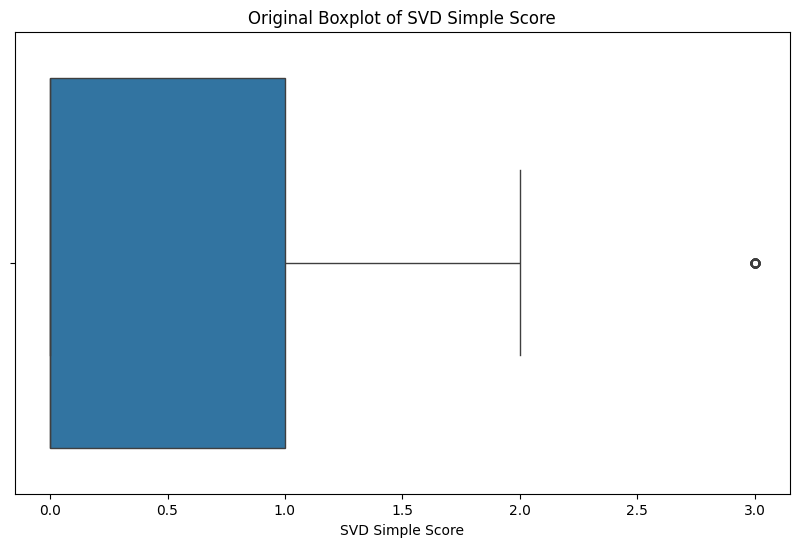

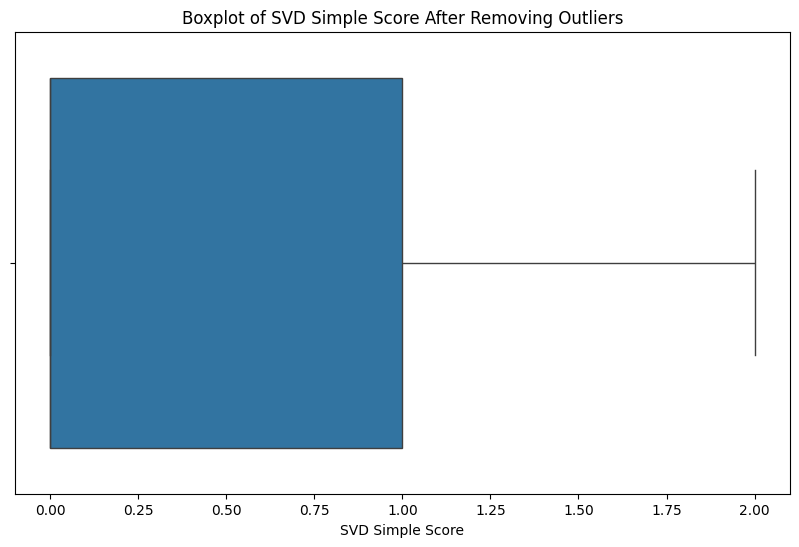

In [40]:
# Draw the original boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_copy['SVD Simple Score'])
plt.title('Original Boxplot of SVD Simple Score')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'ESVD Simple ScoreF' column
Q1 = data_copy['SVD Simple Score'].quantile(0.25)
Q3 = data_copy['SVD Simple Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'SVD Simple Score' column
data_no_outliers = data_copy[(data_copy['SVD Simple Score'] >= lower_bound) & (data_copy['SVD Simple Score'] <= upper_bound)]

# Draw the boxplot after removing the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['SVD Simple Score'])
plt.title('Boxplot of SVD Simple Score After Removing Outliers')
plt.show()


Handling outliers in EF

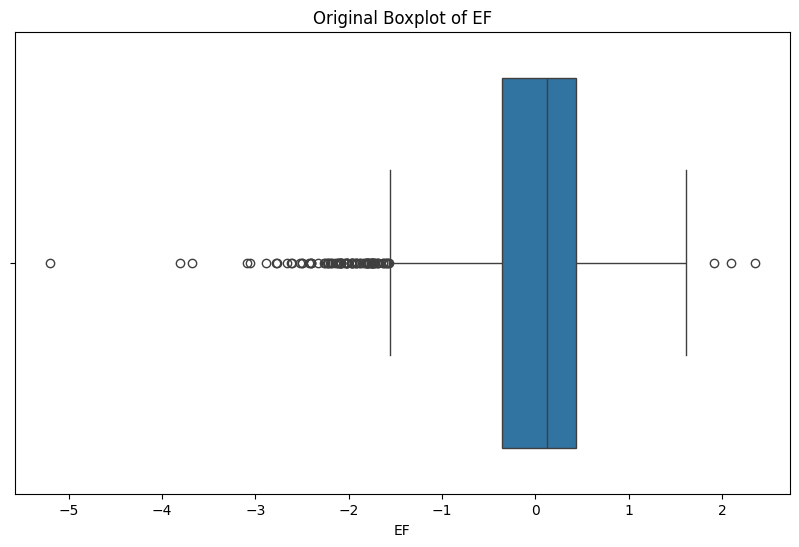

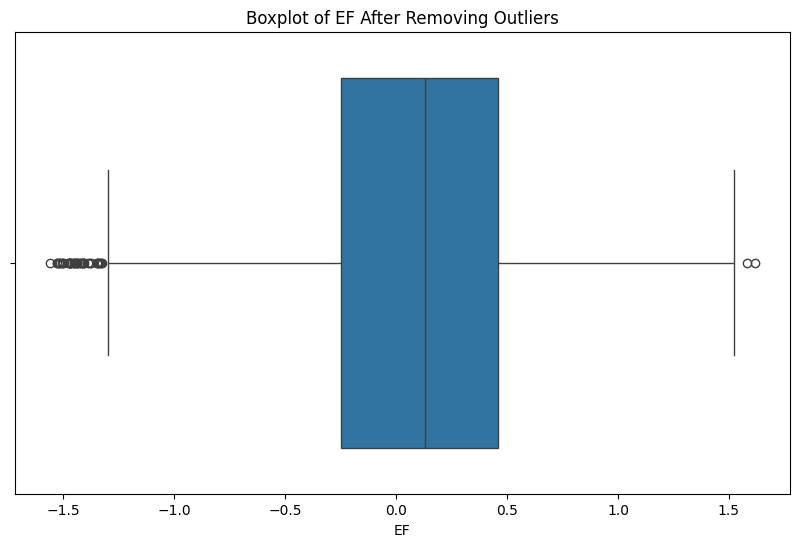

In [41]:
# Draw the original boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_copy['EF'])
plt.title('Original Boxplot of EF')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'EF' column
Q1 = data_copy['EF'].quantile(0.25)
Q3 = data_copy['EF'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'EF' column
data_no_outliers = data_copy[(data_copy['EF'] >= lower_bound) & (data_copy['EF'] <= upper_bound)]

# Draw the boxplot after removing the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['EF'])
plt.title('Boxplot of EF After Removing Outliers')
plt.show()


Handling outliers in Global

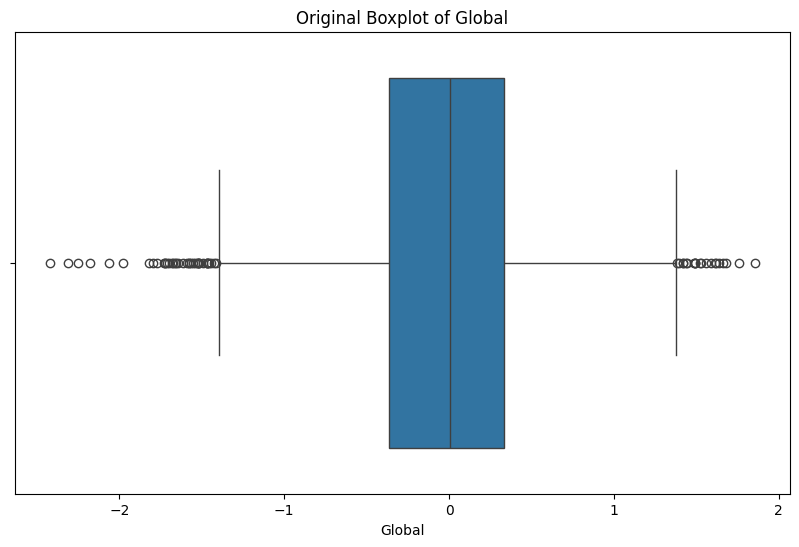

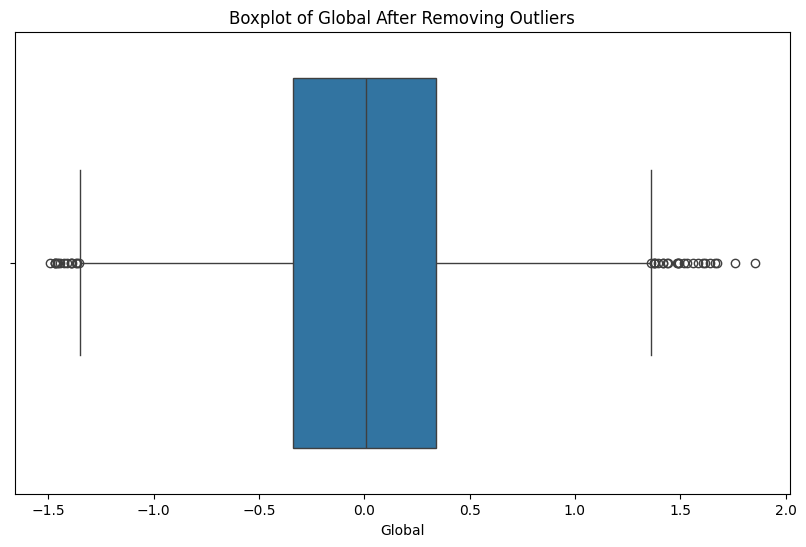

In [ ]:
# Draw the original boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_copy['Global'])
plt.title('Original Boxplot of Global')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'Global' column
Q1 = data_copy['SVD Simple Score'].quantile(0.25)
Q3 = data_copy['SVD Simple Score'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Global' column
data_no_outliers = data_copy[(data_copy['Global'] >= lower_bound) & (data_copy['Global'] <= upper_bound)]

# Draw the boxplot after removing the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['Global'])
plt.title('Boxplot of Global After Removing Outliers')
plt.show()

Handling outliers in PS

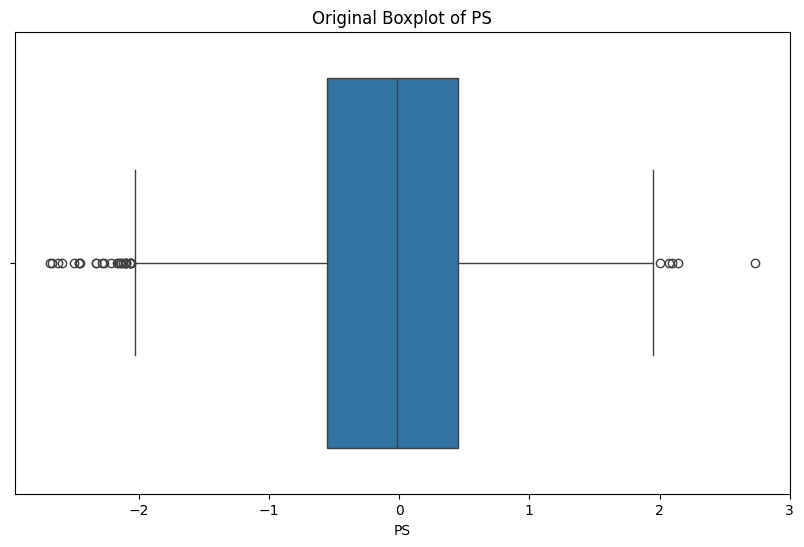

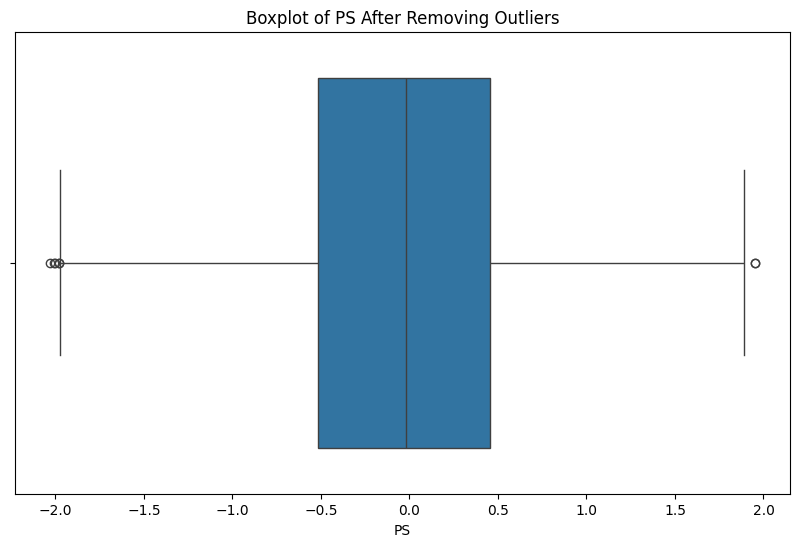

In [42]:
# Draw the original boxplot before removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_copy['PS'])
plt.title('Original Boxplot of PS')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile) of the 'PS' column
Q1 = data_copy['PS'].quantile(0.25)
Q3 = data_copy['PS'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the 'Global' column
data_no_outliers = data_copy[(data_copy['PS'] >= lower_bound) & (data_copy['PS'] <= upper_bound)]

# Draw the boxplot after removing the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers['PS'])
plt.title('Boxplot of PS After Removing Outliers')
plt.show()

Modeling without handling class imbalance

In [43]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

#'data' is  preprocessed
#data_copy = data.copy()
data_copy["EF"].fillna(data_copy["EF"].median(), inplace=True)
data_copy["PS"].fillna(data_copy["PS"].median(), inplace=True)
data_copy["Global"].fillna(data_copy["Global"].median(), inplace=True)
data_copy["SVD Simple Score"].fillna(data_copy["SVD Simple Score"].median(), inplace=True)
data_copy["SVD Amended Score"].fillna(data_copy["SVD Amended Score"].median(), inplace=True)
data_copy["smoking"].fillna(data_copy["smoking"].mode()[0], inplace=True)


# Convert 'gender' from categorical to integer values
data_copy['gender'] = data_copy['gender'].map({'male': 0, 'female': 1})

if isinstance(data_copy['smoking'].iloc[0], str):
    # Define a mapping for 'smoking' that covers all unique string values
    smoking_mapping = {
        'never-smoker': 0,
        'current-smoker': 1,
        'ex-smoker': 2
    }
    # Convert 'smoking' from categorical to integer values using the mapping
    data_copy['smoking'] = data_copy['smoking'].map(smoking_mapping)
else:
    # If the values are already integers, no mapping is needed
    print("The 'smoking' column is already in integer format.")


# Convert 'hypertension' from categorical to integer values using a mapping
hypertension_mapping = {'Yes': 1, 'No': 0}
data_copy['hypertension'] = data_copy['hypertension'].map(hypertension_mapping)

# Convert 'hypercholesterolemia' from categorical to integer values using a mapping
hypercholesterolemia_mapping = {'Yes': 1, 'No': 0}
data_copy['hypercholesterolemia'] = data_copy['hypercholesterolemia'].map(hypercholesterolemia_mapping)


# Define a mapping for 'lacunes_num'
lacunes_num_mapping = {'zero': 0, 'more-than-zero': 1}
# Convert 'lacunes_num' from categorical to integer values using the mapping
data_copy['lacunes_num'] = data_copy['lacunes_num'].map(lacunes_num_mapping)

fazekas_cat_val = data_copy['fazekas_cat'].unique()
#print("fazekas val",fazekas_cat_val)
if 'fazekas_cat' in data_copy.columns:
    fazekas_cat_val = data_copy['fazekas_cat'].unique()
    print("Unique values in 'fazekas_cat' column:", fazekas_cat_val)
else:
    print("'fazekas_cat' column does not exist in the DataFrame.")

non_nan_count = data_copy['fazekas_cat'].notna().sum()
print("Number of non-NaN entries in 'fazekas_cat':", non_nan_count)
# Define a mapping for 'fazekas_cat'
fazekas_cat_mapping = {'0 to 1': 0, '2 to 3': 1}
# Convert 'fazekas_cat' from categorical to integer values using the mapping
data_copy['fazekas_cat'] = data_copy['fazekas_cat'].map(fazekas_cat_mapping)

# Define a mapping for 'study'
study_mapping = {'scans': 0, 'rundmc': 1,'ASPS-family':2,'ASPS-elderly':3}
# Convert 'study' from categorical to integer values using the mapping
data_copy['study'] = data_copy['study'].map(study_mapping)


#Define a mapping for 'lac_count'
lac_count_mapping = {'Zero': 0, '1 to 2': 1, '3 to 5': 2, '>5': 3}
# Convert 'lac_count' from categorical to integer values using the mapping
data_copy['lac_count'] = data_copy['lac_count'].map(lac_count_mapping)



# Define a function to convert values
def convert_cmb_count(value):
    if value == '>=1':
        return 1
    elif pd.isna(value):
        return pd.NA  # Preserve NaN values if you plan to handle them later
    else:
        return int(value)  # Convert numerical strings to integers

# Apply the conversion function to the 'CMB_count' column
data_copy['CMB_count'] = data_copy['CMB_count'].apply(convert_cmb_count)

# Define feature columns
feature_columns = ['age', 'gender', 'dementia_all', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']

print(feature_columns)
# Create the feature DataFrame X by selecting the necessary columns
X = data_copy[feature_columns]
#print(X)

# Set 'dementia_all' as the target variable
y = data_copy['dementia_all']
#print(y)

# Select the relevant columns for the heatmap
#heatmap_data = data_copy[['age',	'gender',	'dementia_all',	'educationyears',	'EF',	'PS',	'Global',	'diabetes',	'smoking',	'hypertension',	'hypercholesterolemia',	'lacunes_num',	'fazekas_cat',	'study',	'SVD Simple Score',	'SVD Amended Score',	'Fazekas',	'lac_count',	'CMB_count']]

# Create the heatmap
#plt.figure(figsize=(12, 10))
#sns.heatmap(heatmap_data.corr(), annot=True, cmap='YlOrRd')
#plt.title('Correlation Heatmap')
#plt.show()

categorical_features = ['gender', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'lac_count']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = one_hot_encoder.fit_transform(data_copy[categorical_features])
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Combine one-hot encoded features with numerical features
numerical_features = ['age', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'CMB_count']
X = pd.concat([X_encoded, data_copy[numerical_features]], axis=1)

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Set the target variable
y = data_copy['dementia_all']

# Handle class imbalance with SMOTE
#smote = SMOTE()
#X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('svc', SVC(kernel='rbf', probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

# Define the final estimator
final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

# Perform stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(stacking_clf, X, y, cv=skf, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Print the cross-validation results
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} +/- {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} +/- {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} +/- {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} +/- {cv_results['test_f1'].std():.2f}")
print(f"ROC AUC: {cv_results['test_roc_auc'].mean():.2f} +/- {cv_results['test_roc_auc'].std():.2f}")

# Fit the model
stacking_clf.fit(X, y)

# Predict and evaluate the model
y_pred = stacking_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, stacking_clf.predict_proba(X_test)[:, 1]))



Unique values in 'fazekas_cat' column: ['2 to 3' '0 to 1']
Number of non-NaN entries in 'fazekas_cat': 1842
['age', 'gender', 'dementia_all', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

Accuracy: 0.94 +/- 0.00
Precision: 0.00 +/- 0.00
Recall: 0.00 +/- 0.00
F1-score: 0.00 +/- 0.00
ROC AUC: 0.78 +/- 0.03
Accuracy: 0.9322493224932249
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC AUC: 0.9944767441860465


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Modeling after handling class imbalances using SMOTE(Over sampling)

In [45]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd


# Define feature columns
feature_columns = ['age', 'gender', 'dementia_all', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']

print(feature_columns)
# Create the feature DataFrame X by selecting the necessary columns
X = data_copy[feature_columns]
#print(X)

# Set 'dementia_all' as the target variable
y = data_copy['dementia_all']
#print(y)

categorical_features = ['gender', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'lac_count']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = one_hot_encoder.fit_transform(data_copy[categorical_features])
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Combine one-hot encoded features with numerical features
numerical_features = ['age', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'CMB_count']
X = pd.concat([X_encoded, data_copy[numerical_features]], axis=1)

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Set the target variable
y = data_copy['dementia_all']

# Handle class imbalance with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('svc', SVC(kernel='rbf', probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

# Define the final estimator
final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

# Perform stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(stacking_clf, X_resampled, y_resampled, cv=skf, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Print the cross-validation results
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} +/- {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} +/- {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} +/- {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} +/- {cv_results['test_f1'].std():.2f}")
print(f"ROC AUC: {cv_results['test_roc_auc'].mean():.2f} +/- {cv_results['test_roc_auc'].std():.2f}")

# Fit the model
stacking_clf.fit(X_resampled, y_resampled)

# Predict and evaluate the model
y_pred = stacking_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, stacking_clf.predict_proba(X_test)[:, 1]))

['age', 'gender', 'dementia_all', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']
Accuracy: 0.91 +/- 0.01
Precision: 0.91 +/- 0.02
Recall: 0.90 +/- 0.02
F1-score: 0.91 +/- 0.01
ROC AUC: 0.97 +/- 0.01
Accuracy: 0.984081041968162
Precision: 0.9967948717948718
Recall: 0.9688473520249221
F1-score: 0.9826224328593997
ROC AUC: 0.9951208217563356


Modeling after handling class imbalances using after undersampling

In [46]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd


# Define feature columns
feature_columns = ['age', 'gender', 'dementia_all', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']

print(feature_columns)
# Create the feature DataFrame X by selecting the necessary columns
X = data_copy[feature_columns]
#print(X)

# Set 'dementia_all' as the target variable
y = data_copy['dementia_all']
#print(y)

categorical_features = ['gender', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'lac_count']
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X_encoded = one_hot_encoder.fit_transform(data_copy[categorical_features])
X_encoded = pd.DataFrame(X_encoded.toarray(), columns=one_hot_encoder.get_feature_names_out(categorical_features))

# Combine one-hot encoded features with numerical features
numerical_features = ['age', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'CMB_count']
X = pd.concat([X_encoded, data_copy[numerical_features]], axis=1)

# Scale numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Set the target variable
y = data_copy['dementia_all']

# Handle class imbalance with RandomUnderSampler


rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('svc', SVC(kernel='rbf', probability=True)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier())
]

# Define the final estimator
final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)

# Perform stratified K-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(stacking_clf, X_resampled, y_resampled, cv=skf, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

# Print the cross-validation results
print(f"Accuracy: {cv_results['test_accuracy'].mean():.2f} +/- {cv_results['test_accuracy'].std():.2f}")
print(f"Precision: {cv_results['test_precision'].mean():.2f} +/- {cv_results['test_precision'].std():.2f}")
print(f"Recall: {cv_results['test_recall'].mean():.2f} +/- {cv_results['test_recall'].std():.2f}")
print(f"F1-score: {cv_results['test_f1'].mean():.2f} +/- {cv_results['test_f1'].std():.2f}")
print(f"ROC AUC: {cv_results['test_roc_auc'].mean():.2f} +/- {cv_results['test_roc_auc'].std():.2f}")

# Fit the model
stacking_clf.fit(X_resampled, y_resampled)

# Predict and evaluate the model
y_pred = stacking_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, stacking_clf.predict_proba(X_test)[:, 1]))

['age', 'gender', 'dementia_all', 'diabetes', 'smoking', 'hypertension', 'hypercholesterolemia', 'lacunes_num', 'fazekas_cat', 'study', 'SVD Simple Score', 'SVD Amended Score', 'Fazekas', 'lac_count', 'CMB_count']
Accuracy: 0.71 +/- 0.03
Precision: 0.72 +/- 0.03
Recall: 0.68 +/- 0.07
F1-score: 0.70 +/- 0.04
ROC AUC: 0.79 +/- 0.03
Accuracy: 0.7872340425531915
Precision: 0.8148148148148148
Recall: 0.8148148148148148
F1-score: 0.8148148148148148
ROC AUC: 0.875
